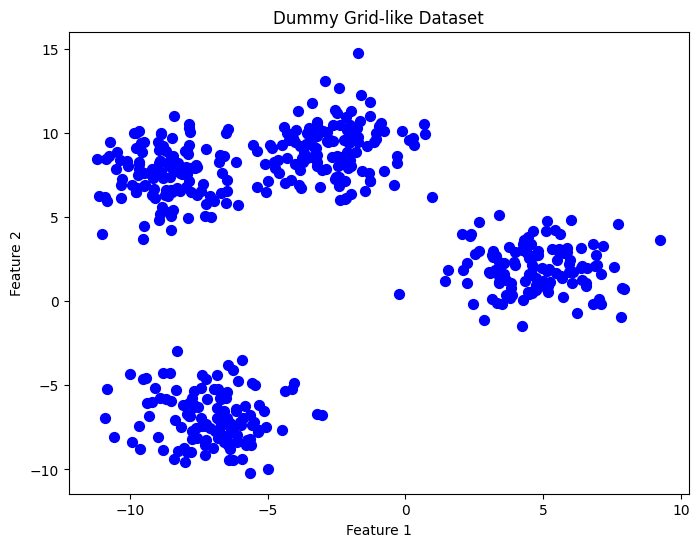

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate a dummy dataset with grid-like structure
X, y = make_blobs(n_samples=500, centers=4, cluster_std=1.5, random_state=42)

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='b', s=50)
plt.title("Dummy Grid-like Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [3]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 32.4 MB/s eta 0:00:00


In [7]:
from sklearn_extra.cluster import KMedoids

# Perform STING clustering using KMedoids
grid_size = 10
sting = KMedoids(n_clusters=4, random_state=42)  # STING uses KMedoids as its clustering algorithm
sting_labels = sting.fit_predict(X)

print(f"STING Clustering:")
print(f"Cluster Assignments: {sting_labels}")


STING Clustering:
Cluster Assignments: [2 0 1 3 0 0 3 0 1 0 1 3 1 3 0 1 3 2 2 3 1 3 1 2 2 0 0 2 2 3 0 3 3 3 0 0 1
 1 2 2 0 1 3 3 3 1 1 1 0 2 0 3 2 0 1 3 3 2 0 2 2 3 0 2 1 0 0 2 1 0 1 0 0 2
 3 2 3 0 1 3 0 1 0 3 2 2 2 2 1 3 2 0 1 0 1 2 3 1 3 2 1 1 1 2 2 3 3 2 3 2 0
 2 2 2 2 0 1 2 0 0 3 1 0 1 2 1 1 0 0 2 2 1 1 0 1 2 2 2 1 1 0 2 1 1 0 2 2 3
 3 3 0 0 1 1 3 2 3 2 0 0 2 2 1 1 0 3 1 0 2 2 0 3 3 2 2 3 3 0 0 0 3 2 3 3 2
 2 3 1 3 0 0 2 2 0 3 0 3 3 2 0 3 3 0 2 1 2 0 1 1 2 2 0 2 3 3 0 3 2 3 1 1 3
 2 3 1 3 3 0 0 1 0 1 3 0 2 0 3 0 1 1 1 0 3 1 2 2 1 3 3 0 3 3 3 3 1 1 2 3 0
 1 3 3 2 3 0 0 1 3 1 0 3 3 1 2 3 3 3 1 2 0 3 1 1 3 0 3 1 2 1 0 0 3 3 1 2 1
 2 1 0 1 0 2 1 1 3 1 0 0 1 1 0 2 1 1 1 0 2 1 1 1 2 1 1 2 2 2 0 2 2 2 2 2 3
 2 1 2 3 3 2 1 1 1 3 3 0 3 0 3 1 0 0 1 0 2 2 0 2 3 0 3 1 3 0 0 2 1 0 1 1 2
 3 0 1 0 2 1 2 1 2 2 0 2 3 0 2 0 3 0 2 0 2 1 3 3 0 0 1 3 3 3 1 2 0 3 1 1 0
 2 0 0 0 3 1 0 3 1 3 3 1 3 1 3 2 0 1 3 0 2 3 1 1 0 0 0 2 0 1 3 3 2 2 1 2 1
 3 0 0 0 3 1 1 2 3 0 0 0 1 0 3 1 2 1 0 1 3 1 3 1 0 3 2 2 3 3 

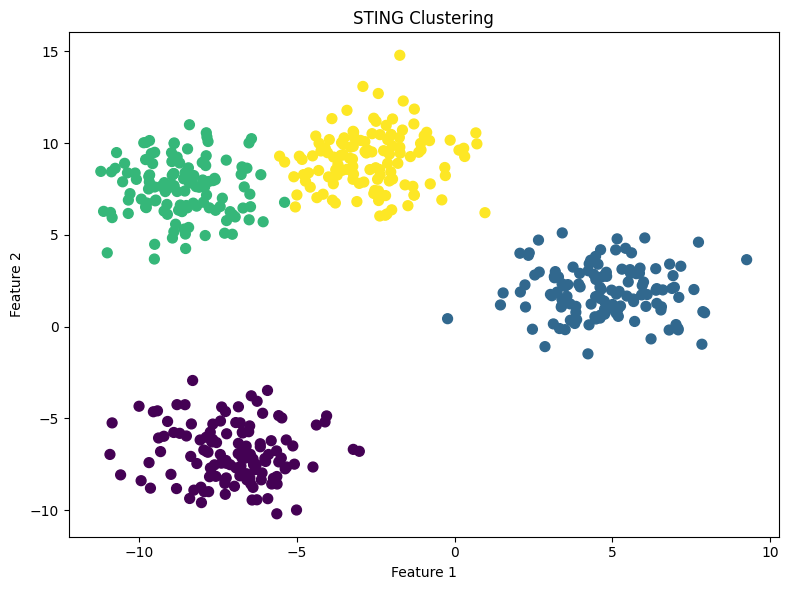

In [8]:
# Visualization of Clustering Results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=sting_labels, cmap='viridis', s=50)
plt.title('STING Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


In [11]:
!pip install pyclustering

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 32.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395103 sha256=25dc82633530cebe9a4a82b6639ad59c382f62c04ecc5cae7d4bdb1d92285d8e
  Stored in directory: /root/.cache/pip/wheels/b5/42/97/11eee99f5c1e4fdfc170f0a54f9c9eb195df66edb4cf69f449
Successfully built pyclustering


Amount of clusters: 4


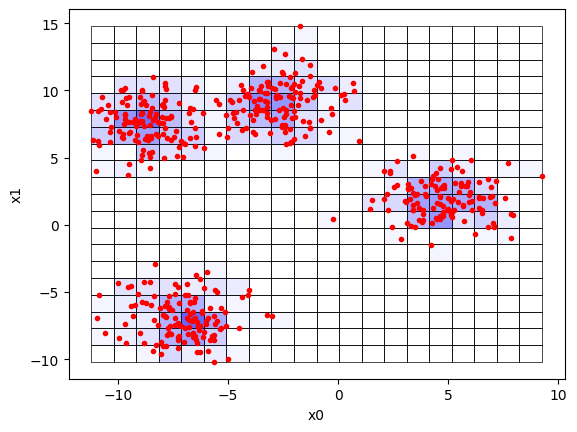

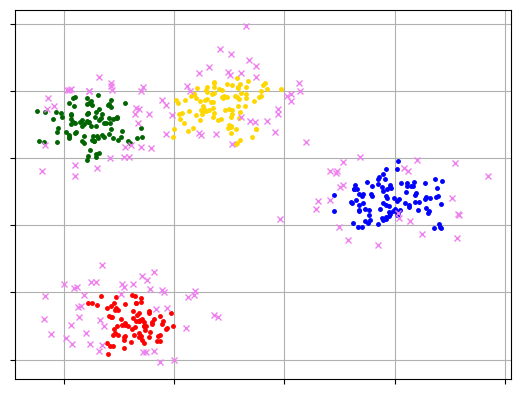

In [31]:
from pyclustering.cluster.clique import clique, clique_visualizer

# Perform CLIQUE clustering
# create CLIQUE algorithm for processing
intervals = 20  # defines amount of cells in grid in each dimension
threshold = 3   # lets consider each point as non-outlier
clique_instance = clique(X.tolist(), intervals, threshold)


# start clustering process and obtain results
clique_instance.process()
clusters = clique_instance.get_clusters()  # allocated clusters
noise = clique_instance.get_noise()     # points that are considered as outliers (in this example should be empty)
cells = clique_instance.get_cells()     # CLIQUE blocks that forms grid

print("Amount of clusters:", len(clusters))

# visualize clustering results
clique_visualizer.show_grid(cells, X.tolist())    # show grid that has been formed by the algorithm
clique_visualizer.show_clusters(X.tolist(), clusters, noise)  # show clustering results
